# Analyze HuBERT Data

In [137]:
# Utilitiies
import numpy as np
import matplotlib.pyplot as plt
import glob 
import os

In [138]:
SEGMENTS = ["aa", "iy"]

In [139]:
hidden_representations = []
save_folder = "./data"

for segment in SEGMENTS:
    save_path = os.path.join(save_folder, f"HS_{segment}.npy")
    hidden_representations.append(
        np.load(save_path)
    )

In [140]:
# print(hidden_representations[0].shape)
# print(hidden_representations[1].shape)

In [141]:
# Resample same ammount
for segment_idx in range(len(SEGMENTS)):

    # TODO understand how the np.random.choice works, TODO check replace = false
    hidden_representations[segment_idx] = hidden_representations[segment_idx][:, :, np.random.choice(
        hidden_representations[segment_idx].shape[2],
        min(hidden_representations[0].shape[2], hidden_representations[1].shape[2]), replace=False)]

Goal: Create a graph where y index represents distinguishability through x (each encoder) to prove "better and better" representations

Note: at each layer we have 500, 1024 vectors for 2 segments
how do we compare them?

- average across the 500 frames at the layer  --> note we don't get the context of the values as well

In [142]:
def cohensd(x, y):
    mnx = np.mean(x)
    mny = np. mean(y)
    sdx = np.std(x)
    sdy = np.std(y)
    return ((mnx-mny) / np.sqrt((((sdx**2)+(sdy**2))/2)))

In [143]:
# num_encoders = 25
# num_frames = 500
# vector_len = 1024
# effect_sizes = np.empty((num_encoders, vector_len))
# for encoder_idx in range(num_encoders):
#     # for frame in range(num_frames):
#     #     for vector in

#     for vector_component in range(vector_len):
#         effect_sizes[encoder_idx, vector_component] = cohensd(hidden_representations[0][encoder_idx, vector_component, :],
#                                                               hidden_representations[1][encoder_idx, vector_component, :])

In [144]:
# # See how many hidden representations's vector component is "distinctive"
# num_distinctive = np.abs(effect_sizes) > 0.5
# # TODO document this
# print(effect_sizes.shape)
# print(np.prod(effect_sizes.shape))
# print(100*np.sum(num_distinctive)/np.prod(effect_sizes.shape))

In [145]:
# # axis = 1 means over rows
# distinctiveness_by_encoder = np.sum(num_distinctive, axis=1)

# plt.plot(distinctiveness_by_encoder, "-o")

(25, 1024)
25600
31.7890625
(25, 1024)
25600
31.1875
(25, 1024)
25600
31.83984375
(25, 1024)
25600
31.9921875
(25, 1024)
25600
31.4375
(25, 1024)
25600
31.70703125
(25, 1024)
25600
31.0859375
(25, 1024)
25600
30.79296875
(25, 1024)
25600
31.59765625
(25, 1024)
25600
31.78125
(25, 1024)
25600
31.78125
(25, 1024)
25600
31.07421875
(25, 1024)
25600
31.71484375
(25, 1024)
25600
31.07421875
(25, 1024)
25600
31.73046875
(25, 1024)
25600
30.8125
(25, 1024)
25600
31.7265625
(25, 1024)
25600
31.44921875
(25, 1024)
25600
31.08984375
(25, 1024)
25600
32.046875


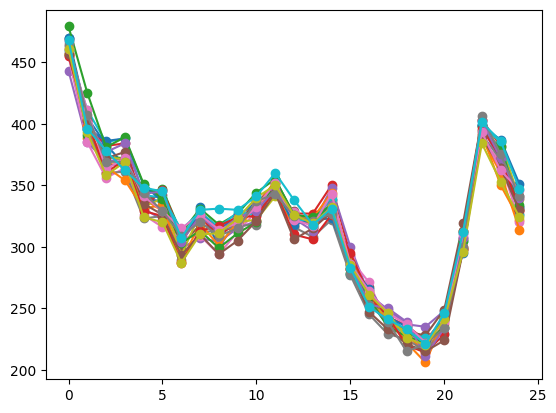

In [146]:
num_encoders = 25
num_frames = 500
vector_len = 1024
num_trials = 20

for trial in range(num_trials):
    hidden_representations = []
    save_folder = "./data"

    for segment in SEGMENTS:
        save_path = os.path.join(save_folder, f"HS_{segment}.npy")
        hidden_representations.append(
            np.load(save_path)
        )

    # Resample same ammount
    for segment_idx in range(len(SEGMENTS)):

        # TODO understand how the np.random.choice works, TODO check replace = false
        hidden_representations[segment_idx] = hidden_representations[segment_idx][:, :, np.random.choice(
            hidden_representations[segment_idx].shape[2],
            min(hidden_representations[0].shape[2], hidden_representations[1].shape[2]), replace=False)]

    effect_sizes = np.empty((num_encoders, vector_len))
    for encoder_idx in range(num_encoders):
        # for frame in range(num_frames):
        #     for vector in

        for vector_component in range(vector_len):
            effect_sizes[encoder_idx, vector_component] = cohensd(hidden_representations[0][encoder_idx, vector_component, :],
                                                                hidden_representations[1][encoder_idx, vector_component, :])

    # See how many hidden representations's vector component is "distinctive"
    num_distinctive = np.abs(effect_sizes) > 0.5
    # TODO document this
    print(effect_sizes.shape)
    print(np.prod(effect_sizes.shape))
    print(100*np.sum(num_distinctive)/np.prod(effect_sizes.shape))

    # axis = 1 means over rows
    distinctiveness_by_encoder = np.sum(num_distinctive, axis=1)

    plt.plot(distinctiveness_by_encoder, "-o")